# Learning Probabilistic Models from Data


This notebook includes examples based on Lecture 7:
- Frequentist parameter estimation (MLE)
- Bayesian parameter estimation with conjugate priors
- Inference in Bayesian Networks using exact and approximate methods


## 1. Frequentist Parameter Estimation

### Example 1: MLE for Bernoulli Distribution

In [1]:
import numpy as np

data = np.random.binomial(1, 0.6, size=50)
p_hat = np.mean(data)
print(f"Estimated p (MLE): {p_hat:.3f}")

Estimated p (MLE): 0.580


### Example 2: MLE for Poisson Distribution

In [2]:
data = np.random.poisson(4, size=100)
lambda_hat = np.mean(data)
print(f"Estimated lambda (MLE): {lambda_hat:.2f}")

Estimated lambda (MLE): 3.98


### Example 3: MLE for Linear Regression

Estimated coefficients: [1.90939499 3.16539826]


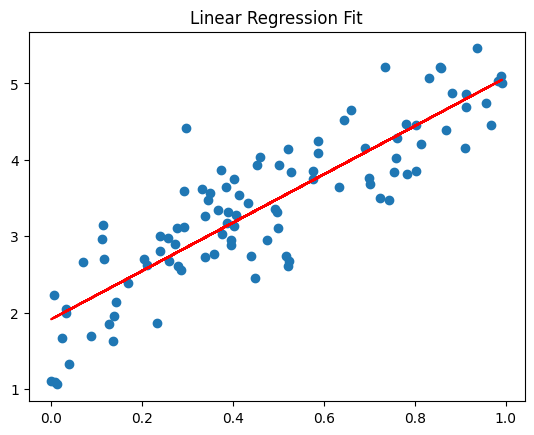

In [3]:
import matplotlib.pyplot as plt

X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.5
X_b = np.c_[np.ones((100, 1)), X]
theta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(f"Estimated coefficients: {theta_hat}")

plt.scatter(X, y)
plt.plot(X, X_b @ theta_hat, color='red')
plt.title("Linear Regression Fit")
plt.show()

## 2. Bayesian Parameter Estimation

### Example 1: Beta-Bernoulli Posterior

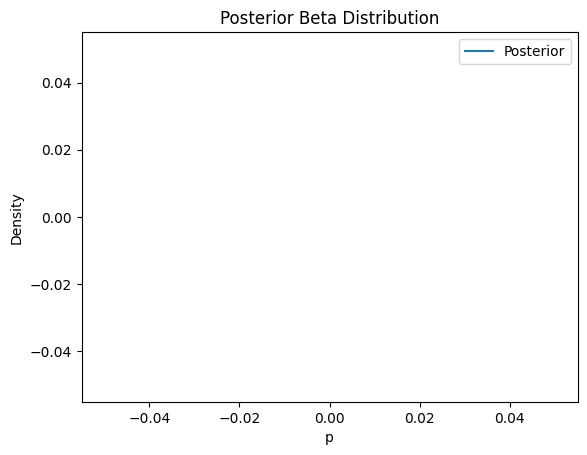

In [4]:
import scipy.stats as stats

alpha, beta = 2, 2
x = np.linspace(0, 1, 100)
posterior = stats.beta.pdf(x, alpha + data.sum(), beta + len(data) - data.sum())

plt.plot(x, posterior, label="Posterior")
plt.title("Posterior Beta Distribution")
plt.xlabel("p")
plt.ylabel("Density")
plt.legend()
plt.show()

### Example 2: Gamma-Poisson Posterior

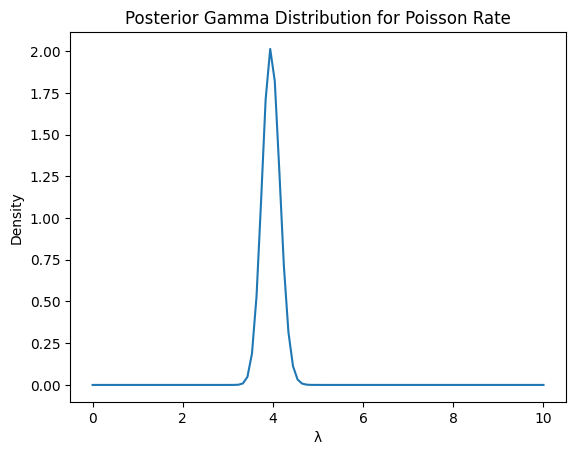

In [5]:
x = np.linspace(0, 10, 100)
posterior = stats.gamma.pdf(x, a=2 + data.sum(), scale=1/(1 + len(data)))

plt.plot(x, posterior)
plt.title("Posterior Gamma Distribution for Poisson Rate")
plt.xlabel("λ")
plt.ylabel("Density")
plt.show()

### Example 3: Bayesian Linear Regression

In [6]:
prior_mean = np.zeros(2)
prior_cov = np.eye(2)
sigma2 = 0.25

posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + (X_b.T @ X_b) / sigma2)
posterior_mean = posterior_cov @ (X_b.T @ y) / sigma2

print("Posterior mean:", posterior_mean)
print("Posterior covariance:", posterior_cov)

Posterior mean: [1.93740531 3.09510896]
Posterior covariance: [[ 0.00920965 -0.01440425]
 [-0.01440425  0.03089428]]


## 3. Inference in Bayesian Networks

### Example 1: Exact Inference via Variable Elimination

In [8]:

p_x1 = np.array([0.6, 0.4])
p_x2_given_x1 = np.array([[0.7, 0.3], [0.2, 0.8]])
p_x3_given_x1 = np.array([[0.9, 0.1], [0.4, 0.6]])

joint = np.zeros((2,2))
for x1 in [0, 1]:
    for x2 in [0, 1]:
        for x3 in [0, 1]:
            joint[x2, x3] += p_x1[x1] * p_x2_given_x1[x1, x2] * p_x3_given_x1[x1, x3]

print("Joint distribution p(x2,x3):", joint)
print("Marginal p(x2):", joint.sum(axis=1))


Joint distribution p(x2,x3): [[0.41 0.09]
 [0.29 0.21]]
Marginal p(x2): [0.5 0.5]


### Example 2: Approximate Inference via Logic Sampling

In [9]:
samples = 10000
x1 = np.random.choice([0, 1], size=samples, p=p_x1)
x2 = np.array([np.random.choice([0, 1], p=p_x2_given_x1[i]) for i in x1])
x3 = np.array([np.random.choice([0, 1], p=p_x3_given_x1[i]) for i in x1])

approx_joint = np.zeros((2,2))
for i in range(samples):
    approx_joint[x2[i], x3[i]] += 1
approx_joint /= samples

print("Approximate p(x2,x3) from samples:", approx_joint)


Approximate p(x2,x3) from samples: [[0.4124 0.0899]
 [0.2873 0.2104]]


### Example 3: Monte Carlo Estimation of Posterior Mean

In [10]:
samples = np.random.multivariate_normal(posterior_mean, posterior_cov, size=1000)
mean_estimate = np.mean(samples, axis=0)
print("Monte Carlo Estimate of Posterior Mean:", mean_estimate)

Monte Carlo Estimate of Posterior Mean: [1.94155068 3.0857214 ]
